Base code: 240918_botorch_extensive_data.ipynb

## Data loading

In [1]:
# @title 1) Loading data

# Loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading excel file
import os
from glob import glob
# path = "/Users/djayshin/Dropbox/0.Dongjae/04.SUNCAT@SLAC,Standford(2402~)/231128_research/Data/data_dj/240918_extensive_data_for_ML/240918_extensive_compact_ML.xlsx"
# path = "/Users/djayshin/Dropbox/0.Dongjae/04.SUNCAT@SLAC,Standford(2402~)/231128_research/240602_ML_codes/241121_exported_sheets_ML/20241121_sheet_for_ML_unique.xlsx"
# path = "/Users/dongjae/Dropbox/0.Dongjae/04.SUNCAT@SLAC,Standford(2402~)/231128_research/240602_ML_codes/241121_exported_sheets_ML/20241204_sheet_for_ML_unique.xlsx"
# path = "/Users/dongjae/Dropbox/0.Dongjae/04.SUNCAT@SLAC,Standford(2402~)/231128_research/240602_ML_codes/241121_exported_sheets_ML/20241229_sheet_for_ML_unique.xlsx"
# path = "/Users/djayshin/Dropbox/0.Dongjae/04.SUNCAT@SLAC,Standford(2402~)/231128_research/240602_ML_codes/CatNaviGATE/tests/20250228_sheet_for_ML_unique.xlsx"
path = "/Users/dongjae/Dropbox/0.Dongjae/04.SUNCAT@SLAC,Standford(2402~)/231128_research/240602_ML_codes/CatNaviGATE/tests/20250228_sheet_for_ML_unique.xlsx"

df = pd.read_excel(path, header=0)
df = df.drop(labels=['filename','experiment_date', 'location', 'GroupID'], axis=1)
# df = df.drop(labels=['source','name'], axis=1)

df.replace(
    {
        'WI': 0,
        'NP': 1
    }, 
    inplace=True
)

print(df.dtypes)

display(df)

columns = df.columns

# Converting dataframe into a numpy array
data = df.to_numpy().reshape(len(df),-1)

Xtrain = data[:,:-1]
ytrain = data[:,-1:]

print(f'Xtrain {Xtrain.shape}: \n{Xtrain}')
print(f'ytrain {ytrain.shape}: \n{ytrain}')

reaction_temp                         int64
Rh_weight_loading                   float64
Rh_total_mass                       float64
synth_method                          int64
CO2 Conversion (%)_initial value    float64
dtype: object


/var/folders/26/fw595kz14qg6n4glslpg2nd80000gn/T/ipykernel_6186/1189686997.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(


,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,CO2 Conversion (%)_initial value
0,500,0.10,0.020,1,12.717100
1,500,0.50,0.040,0,52.105391
2,500,0.50,0.010,0,27.147187
3,400,1.00,0.020,0,13.130804
4,500,0.25,0.040,1,22.071110
5,300,1.00,0.005,1,1.964166
6,300,0.10,0.020,0,1.303779
7,500,1.00,0.040,0,36.017692
8,300,0.10,0.005,0,1.001144
9,400,1.00,0.020,1,3.866411


Xtrain (18, 4): 
[[5.0e+02 1.0e-01 2.0e-02 1.0e+00]
 [5.0e+02 5.0e-01 4.0e-02 0.0e+00]
 [5.0e+02 5.0e-01 1.0e-02 0.0e+00]
 [4.0e+02 1.0e+00 2.0e-02 0.0e+00]
 [5.0e+02 2.5e-01 4.0e-02 1.0e+00]
 [3.0e+02 1.0e+00 5.0e-03 1.0e+00]
 [3.0e+02 1.0e-01 2.0e-02 0.0e+00]
 [5.0e+02 1.0e+00 4.0e-02 0.0e+00]
 [3.0e+02 1.0e-01 5.0e-03 0.0e+00]
 [4.0e+02 1.0e+00 2.0e-02 1.0e+00]
 [5.0e+02 2.5e-01 1.0e-02 1.0e+00]
 [3.0e+02 1.0e+00 5.0e-03 0.0e+00]
 [5.0e+02 5.0e+00 2.0e-02 0.0e+00]
 [5.0e+02 1.0e-01 2.0e-02 0.0e+00]
 [5.0e+02 2.5e-01 2.0e-02 1.0e+00]
 [5.0e+02 2.5e-01 2.0e-02 0.0e+00]
 [5.0e+02 5.0e-01 2.0e-02 1.0e+00]
 [5.0e+02 5.0e-01 2.0e-02 0.0e+00]]
ytrain (18, 1): 
[[12.71709985]
 [52.10539129]
 [27.1471868 ]
 [13.13080363]
 [22.07111029]
 [ 1.96416624]
 [ 1.30377891]
 [36.01769186]
 [ 1.00114416]
 [ 3.86641089]
 [ 4.01281366]
 [ 0.47545777]
 [ 7.07959383]
 [15.94705213]
 [11.42581351]
 [17.21199508]
 [21.47735158]
 [27.10009917]]


## Data scaling

In [2]:
# @title Scaling & descaling functions and preprocessor
import torch
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer

def scale(data, max, min):
    # Original(physical) space => Scaled space [0, 1]
    data_scaled = (data - min) / (max - min)
    return data_scaled

def descale(data, max, min):
    # Scaled space [0, 1] => Original(physical) space
    data_descaled = data * (max - min) + min
    return data_descaled

def scaler_X(X, x_range_max, x_range_min):
    scaled = X.copy()
    for i in range(X.shape[1]):
      scaled[:,i] = scale(scaled[:,i], x_range_max[i], x_range_min[i])
      # Temperature, Pressure, fCO2, wRh, mcatal
    return scaled

def descaler_X(X, x_range_max, x_range_min):
    descaled = X.copy()
    for i in range(X.shape[1]):
      descaled[:,i] = descale(descaled[:,i], x_range_max[i], x_range_min[i])
      # Temperature, Pressure, fCO2, wRh, mcatal
    return descaled

In [3]:
df_Xtrain = df.drop(labels=['CO2 Conversion (%)_initial value'], axis=1)
df_ytrain = df[['CO2 Conversion (%)_initial value']]
# print('df_Xtrain.dtypes', df_Xtrain.dtypes)

In [4]:
# select numerical feature columns & define numerical transformer
numerical_columns_selector = selector(dtype_exclude=object)
numerical_features = numerical_columns_selector(df_Xtrain)
print('numerical_features (selected): ', numerical_features)

# Construct custom scaler that scales both X and y
x_range_min = [300, 0.1, 0.005, 0]
x_range_max = [550, 1.0, 0.02, 1]
# x_range_min = [300, 0.1, 0.0005, 0]
# x_range_max = [550, 1.0, 0.0205, 1]

numerical_transformer=FunctionTransformer(
    func        =scaler_X,
    kw_args     ={'x_range_max': x_range_max,
                  'x_range_min': x_range_min},
    inverse_func=descaler_X,
    inv_kw_args ={'x_range_max': x_range_max,
                  'x_range_min': x_range_min},
    validate=True,
    check_inverse=True
)

# select categorical feature columns & define categorical transformer
categorical_columns_selector = selector(dtype_include=object)
categorical_features = categorical_columns_selector(df_Xtrain)
print('categorical_features (selected): ', categorical_features)

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore")),]
)

# Combining together
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features),
    ],
    # remainder="passthrough",
)

preprocessor_y = StandardScaler()

numerical_features (selected):  ['reaction_temp', 'Rh_weight_loading', 'Rh_total_mass', 'synth_method']
categorical_features (selected):  []


In [5]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 FunctionTransformer(func=<function scaler_X at 0x153b14b80>,
                                                     inv_kw_args={'x_range_max': [550,
                                                                                  1.0,
                                                                                  0.02,
                                                                                  1],
                                                                  'x_range_min': [300,
                                                                                  0.1,
                                                                                  0.005,
                                                                                  0]},
                                                     inverse_func=<function descaler_X at 0x153b15120>,
                                                     kw_args={'x_range_max': [550,
                                                                              1.0,
                                                                              0.02,
                                                                              1],
                                                              'x_range_min': [300,
                                                                              0.1,
                                                                              0.005,
                                                                              0]},
                                                     validate=True),
                                 ['reaction_temp', 'Rh_weight_loading',
                                  'Rh_total_mass', 'synth_method']),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

In [6]:
preprocessor_y

StandardScaler()

In [7]:
preprocessor.fit(df_Xtrain)
preprocessor_y.fit(df_ytrain)
Xtrain_trans = preprocessor.transform(df_Xtrain)
ytrain_trans = preprocessor_y.transform(df_ytrain)

/Users/dongjae/miniconda3/envs/spyder-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


In [242]:
pd.DataFrame(Xtrain_trans)

,0,1,2,3,4
0,0.8,0.444444,1.000000,0.0,1.0
1,0.8,0.444444,1.007848,1.0,0.0
2,0.0,1.000000,-0.300000,0.0,1.0
3,0.8,5.444444,1.000000,0.0,1.0
4,0.8,0.166667,0.333333,1.0,0.0
5,0.8,0.166667,1.000000,1.0,0.0
6,0.8,0.166667,1.000000,0.0,1.0
7,0.8,0.444444,1.000000,1.0,0.0
8,0.8,1.000000,2.333333,0.0,1.0
9,0.8,0.166667,0.984909,1.0,0.0


In [15]:
pd.DataFrame(ytrain_trans)

,0
0,0.103722
1,1.320393
2,-1.625178
3,1.614370
4,0.391459
5,0.423302
6,1.667541
7,1.524456
8,-0.690875
9,0.682622


### test: reconstruction by inverse transform

In [13]:
Xtrain_trans

array([[ 0.8       ,  0.44444444,  1.        ,  0.        ,  1.        ],
       [ 0.8       ,  0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.8       ,  0.44444444,  1.00784835,  1.        ,  0.        ],
       [ 0.        ,  1.        , -0.3       ,  0.        ,  1.        ],
       [ 0.8       ,  0.16666667,  1.        ,  0.        ,  1.        ],
       [ 0.8       ,  5.44444444,  1.        ,  0.        ,  1.        ],
       [ 0.8       ,  0.16666667,  0.33333333,  1.        ,  0.        ],
       [ 0.8       ,  0.16666667,  1.        ,  1.        ,  0.        ],
       [ 0.8       ,  0.44444444,  1.        ,  0.        ,  1.        ],
       [ 0.8       ,  0.16666667,  1.        ,  0.        ,  1.        ],
       [ 0.8       ,  0.44444444,  1.        ,  1.        ,  0.        ],
       [ 0.8       ,  1.        ,  2.33333333,  0.        ,  1.        ],
       [ 0.8       ,  0.16666667,  0.98490866,  1.        ,  0.        ],
       [ 0.8       ,  0.44444444,  1. 

In [8]:
def inv_transform(
    X_trans, X_fit,
    numerical_transformer, categorical_transformer,
):
    n_numerical = len(numerical_transformer.get_params()['kw_args']['x_range_max'])
    numerical_transformer.fit(X_fit[:,:n_numerical])
    categorical_transformer.fit(X_fit[:,n_numerical:])
    return np.concatenate(
        (
            numerical_transformer.inverse_transform(X_trans[:,:n_numerical]),
            categorical_transformer.inverse_transform(X_trans[:,n_numerical:])
        ),
        axis=1
        )

In [277]:
Xtrain_reconst = inv_transform(
    X_trans = Xtrain_trans,
    X_fit = Xtrain,
    numerical_transformer=numerical_transformer,
    categorical_transformer=categorical_transformer
)

pd.DataFrame(Xtrain_reconst)

,0,1,2,3
0,500.0,0.5,0.02,WI
1,500.0,0.5,0.020118,NP
2,300.0,1.0,0.0005,WI
3,500.0,5.0,0.02,WI
4,500.0,0.25,0.01,NP
5,500.0,0.25,0.02,NP
6,500.0,0.5,0.02,NP
7,500.0,1.0,0.04,WI
8,500.0,0.5,0.02,NP
9,500.0,0.5,0.01,WI


In [19]:
ytrain_reconst = preprocessor_y.inverse_transform(ytrain_trans)

pd.DataFrame(ytrain_reconst)

,0
0,-8.604711
1,-1.792985
2,-18.284231
3,-0.147108
4,-6.993770
5,-6.815488
6,0.150581
7,-0.650506
8,-13.053386
9,-5.363647


## Uncertainty sampling (US) by `botorch`

In [8]:
import torch
from botorch.models import SingleTaskGP, MixedSingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.models.transforms.outcome import Standardize
from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.kernels import RBFKernel, MaternKernel, ScaleKernel
from gpytorch.constraints import GreaterThan, Interval
from gpytorch.priors import LogNormalPrior

/Users/dongjae/miniconda3/envs/spyder-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### conversion of training data into `torch.tensor`

In [9]:
# making tensor for input data
Xtrain_tensor = torch.tensor(Xtrain_trans)

# making tensor for output data
ytrain_tensor = torch.tensor(ytrain_trans)

Xtrain_tensor, ytrain_tensor

(tensor([[0.8000, 0.0000, 1.0000, 1.0000],
         [0.8000, 0.4444, 2.3333, 0.0000],
         [0.8000, 0.4444, 0.3333, 0.0000],
         [0.4000, 1.0000, 1.0000, 0.0000],
         [0.8000, 0.1667, 2.3333, 1.0000],
         [0.0000, 1.0000, 0.0000, 1.0000],
         [0.0000, 0.0000, 1.0000, 0.0000],
         [0.8000, 1.0000, 2.3333, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.4000, 1.0000, 1.0000, 1.0000],
         [0.8000, 0.1667, 0.3333, 1.0000],
         [0.0000, 1.0000, 0.0000, 0.0000],
         [0.8000, 5.4444, 1.0000, 0.0000],
         [0.8000, 0.0000, 1.0000, 0.0000],
         [0.8000, 0.1667, 1.0000, 1.0000],
         [0.8000, 0.1667, 1.0000, 0.0000],
         [0.8000, 0.4444, 1.0000, 1.0000],
         [0.8000, 0.4444, 1.0000, 0.0000]], dtype=torch.float64),
 tensor([[-0.1934],
         [ 2.7149],
         [ 0.8721],
         [-0.1629],
         [ 0.4973],
         [-0.9874],
         [-1.0361],
         [ 1.5271],
         [-1.0585],
         [-0.8469],
   

### How categorical features are treated

See the source code for CategoricalKernel (https://botorch.org/api/_modules/botorch/models/kernels/categorical.html#CategoricalKernel)
* Computes `exp(-dist(x1, x2) / lengthscale)`, where
    `dist(x1, x2)` is zero if `x1 == x2` and one if `x1 != x2`.
    If the last dimension is not a batch dimension, then the
    mean is considered.

In [204]:
from botorch.models.kernels.categorical import CategoricalKernel

# 두 개의 4차원 벡터 정의, unsqueeze: 벡터를 2D 텐서로 변환 (모양: 1 x D)
x1 = torch.tensor([1,1,0,0]).unsqueeze(0) # unsqueeze make specified dim. be 1 (similar to reshape)
x2 = torch.tensor([1,0,0,0]).unsqueeze(0)

# Categorical 커널 초기화
active_dims = torch.tensor([1,2,])
cat_kernel = CategoricalKernel(
    ard_num_dims=len(active_dims),
    active_dims = active_dims
)

# 커널 함수로 공분산 계산
covariance = cat_kernel(x1, x2)

print(f"Covariance between x1 and x2: {covariance.to_dense()}")

Covariance between x1 and x2: tensor([[0.4861]], grad_fn=<ExpBackward0>)


So, the part of the vector specified by `active_dims` is fed into a kernel function, and the covariance of two input vectors x1 and x2 is calculated.

In [207]:
# generated by ChatGPT
import gpytorch
from gpytorch.kernels import RBFKernel

# 두 개의 4차원 벡터 정의, unsqueeze: 벡터를 2D 텐서로 변환 (모양: 1 x D)
x1 = torch.tensor([1.0, 2.0, 4.0, 4.0]).unsqueeze(0)
x2 = torch.tensor([2.0, 3.0, 4.0, 5.0]).unsqueeze(0)

# RBF 커널 초기화
active_dims = torch.tensor([0,1,2,])
cont_kernel = RBFKernel(
    ard_num_dims=len(active_dims),
    active_dims = active_dims # active_dims 인자를 통해 사용할 차원을 지정 (예: 첫 번째와 세 번째 차원 사용)
)

# 커널 함수로 공분산 계산
covariance = cont_kernel(x1, x2)

print(f"Covariance between x1 and x2: {covariance.to_dense()}")

Covariance between x1 and x2: tensor([[0.1248]], grad_fn=<ExpBackward0>)


### a. on continuous space

In [1]:
from botorch.acquisition.analytic import PosteriorStandardDeviation
from botorch.optim import optimize_acqf, optimize_acqf_mixed
from gpytorch.priors import LogNormalPrior

# Instantiate a GPR
# gp = MixedSingleTaskGP(
#     Xtrain_tensor,
#     ytrain_tensor,
#     cat_dims = [3, 4]
# )

# covar_module = ScaleKernel(RBFKernel(ard_num_dims=4))
# covar_module = ScaleKernel(MaternKernel(
#     nu=2.5, 
#     ard_num_dims=4,
#     lengthscale_constraint=Interval(1e-04, 5.0)
# ))
#Note: it seems the constraints in gpytorch are not compatible with botorch's fit_gpytorch_mll

# covar_module = ScaleKernel(MaternKernel(nu=2.5, ard_num_dims=4))

# default covar_module is MaternKernel
gp = SingleTaskGP(
    Xtrain_tensor,
    ytrain_tensor,
    # covar_module=covar_module
)

# For regularization of lengthscales (compatible with fit_gpytorch_mll)
# gp.covar_module.base_kernel.register_prior(
#     "lengthscale_prior", LogNormalPrior(0.0, 2.0), "lengthscale"
# )

# display(gp)

# Optimize kernel parameter & noise
mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
fit_gpytorch_mll(mll)

# Instantiate a acquisition function
US = PosteriorStandardDeviation(gp)
# cf. UCB = UpperConfidenceBound(gp, beta=0.1)

# bounds = torch.stack([
#     torch.tensor([0., 0., 0., 0.]),
#     torch.tensor([1., 1., 1., 1.])
#     ])

# candidate, acq_value = optimize_acqf(
#     US, bounds=bounds, q=1, num_restarts=10, raw_samples=20,
# )

# print(f'candidate: {candidate}\nacq_value: {acq_value}\nUS.forward(candidate): {US.forward(candidate)}')

# fixed_features_list = [
#     [{3:0., 4:1.}], # impregnation, WI
#     [{3:1., 4:0.}]  # colloidal, NP
# ]

# candidates = []
# acq_values = []

# # Optmize only for numerical features with a set of fixed one-hot encoded features
# for fixed_features in fixed_features_list:
#   candidate, acq_value = optimize_acqf_mixed(
#       US, bounds=bounds, q=1, num_restarts=60, raw_samples=60,
#       fixed_features_list=fixed_features,
#   ) # q > 1 doesn't work...?

#   print(candidate, acq_value)
#   candidates.append(candidate) # = np.vstack((candidates, candidate[0]))
#   acq_values.append(acq_value) #= np.vstack((acq_values, acq_value[0]))

/Users/dongjae/miniconda3/envs/spyder-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'SingleTaskGP' is not defined

### print hyperparameters

In [37]:
gp.covar_module

ScaleKernel(
  (base_kernel): MaternKernel(
    (lengthscale_prior): GammaPrior()
    (raw_lengthscale_constraint): Positive()
  )
  (outputscale_prior): GammaPrior()
  (raw_outputscale_constraint): Positive()
)

In [ ]:
gp.covar_module.kernels

In [39]:
for param_name, param in gp.named_parameters():
    if 'lengthscale' in param_name:
        print(f'Parameter name: {param_name:42} \nvalue = {param}')

Parameter name: covar_module.base_kernel.raw_lengthscale   
value = Parameter containing:
tensor([[-1.0185, -1.0940, -0.9456, -0.8817]], dtype=torch.float64,
       requires_grad=True)


### US suggestion in original scale

In [669]:
for i in range(2):
    print(
        inv_transform(
        X_trans=candidates[i],
        X_fit=Xtrain,
        numerical_transformer=numerical_transformer,
        categorical_transformer=categorical_transformer
        )
    )

[[308.86004638671875 0.18414106965065002 0.004999999888241291 'WI']]
[[322.0260925292969 0.16949257254600525 0.004999999888241291 'NP']]


### b. on discrete space

In [11]:
# unlabeled data set for all the possible combinations of input features
temp_max = 550
temp_min = 300
temp_step = 50
n_temp_grid = int((temp_max - temp_min) / temp_step + 1)

m_rh_max = 0.02
m_rh_min = 0.005
m_rh_step = 0.0025
n_m_rh_grid = int((m_rh_max - m_rh_min) / m_rh_step + 1)

w_rh_max = 1.0
w_rh_min = 0.1
w_rh_step = 0.1
n_w_rh_grid = int((w_rh_max - w_rh_min) / w_rh_step + 1)

temp = np.linspace(temp_min, temp_max, n_temp_grid)
m_rh = np.linspace(m_rh_min, m_rh_max, n_m_rh_grid)
w_rh = np.linspace(w_rh_min, w_rh_max, n_w_rh_grid)

In [12]:
# print(f'temp:\n{temp}\nm_rh:\n{m_rh}\nw_rh:\n{w_rh}\n')
n_total = len(temp)*len(m_rh)*len(w_rh)
print(f'{n_total} combinations are possible.')

420 combinations are possible.


In [13]:
# all the combinations of T, w_Rh, and m_Rh
X_discrete = np.array(
    [[i, j, k] for i in temp for j in w_rh for k in m_rh]
)
X_discrete[:,0] = X_discrete[:,0].round(decimals=0)
X_discrete[:,1] = X_discrete[:,1].round(decimals=1)
X_discrete[:,2] = X_discrete[:,2].round(decimals=4)

# unlabeled data set for 'colloidal'
X_discrete_colloidal = pd.DataFrame(
    np.concatenate(
        (X_discrete, np.full((n_total,1), fill_value=1)),
        axis=1
        )
)

# unlabeled data set for 'impregnation'
X_discrete_impregnation = pd.DataFrame(
    np.concatenate(
        (X_discrete, np.full((n_total,1), fill_value=0)),
        axis=1
        )
)

X_discrete_colloidal.shape, X_discrete_impregnation.shape

((420, 4), (420, 4))

#### b-1. for colloidal (NP) synthesis

In [14]:
# number of conditions to be suggested
n_candidates = 5

# adding column information for preprocessor
X_discrete_colloidal.columns=columns.drop(labels='delta_CO2_conv')

# scaling and making tensor
X_discrete_colloidal_trans = torch.tensor(
    preprocessor.transform(X_discrete_colloidal)
)

# calculate posterior standard deviation for all the possible feature vectors
std = US.forward(
    X_discrete_colloidal_trans.reshape(
        len(X_discrete_colloidal_trans),1,4)
).detach().numpy()

top_ids = np.argsort(-std)[:n_candidates] # negativity: sort in reverse order

# show top 'n_candidates' uncertain conditions 
display(
    X_discrete_colloidal.join(
        pd.DataFrame(std, columns=['std. dev.']) # append uncertainty info.
    ).iloc[top_ids,:]
)

,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,std. dev.
413,550.0,1.0,0.0050,1.0,1.042063
4,300.0,0.1,0.0150,1.0,1.041630
5,300.0,0.1,0.0175,1.0,1.041586
6,300.0,0.1,0.0200,1.0,1.041560
414,550.0,1.0,0.0075,1.0,1.041520


#### b-2. for impregnation (WI) synthesis

In [15]:
# pd.set_option('display.max_rows', 500)
pd.reset_option('display.max_rows')

# number of conditions to be suggested
n_candidates = 5

# adding column information for preprocessor
X_discrete_impregnation.columns=columns.drop(labels='delta_CO2_conv')

# scaling and making tensor
X_discrete_impregnation_trans = torch.tensor(
    preprocessor.transform(X_discrete_impregnation)
)

# calculate posterior standard deviation for all the possible feature vectors
std = US.forward(
    X_discrete_impregnation_trans.reshape(
        len(X_discrete_impregnation_trans),1,4)
).detach().numpy()

top_ids = np.argsort(-std)[:n_candidates] # negativity: sort in reverse order

# show top 'n_candidates' uncertain conditions 
display(
    X_discrete_impregnation.join(
        pd.DataFrame(std, columns=['std. dev.']) # append uncertainty info.
    ).iloc[top_ids,:]
)

,reaction_temp,Rh_weight_loading,Rh_total_mass,synth_method,std. dev.
6,300.0,0.1,0.0200,0.0,1.041209
13,300.0,0.2,0.0200,0.0,1.041010
20,300.0,0.3,0.0200,0.0,1.040658
5,300.0,0.1,0.0175,0.0,1.039733
27,300.0,0.4,0.0200,0.0,1.039702


* Although the number of training data for each synthesis method is different, it seems the suggested conditions are almost the same for both synthesis methods. 
* It might be attributed to the similar data distribution between two methods, e.g., avg(T) = 500, avg(w_Rh) = 0.89 (impreg), 0.27 (colloidal) , avg(m_Rh) = ~0.02 (for both methods). Thus, the US basically tries to search **boundary-like** region.

## Visualization of uncertainty

In [45]:
# function that calculates uncertainty & mean in original scale
@np.vectorize
def wrapper_std_colloidal(wrh, mrh, temperature=500):
    
    # dataframing for preprocessor
    X = pd.DataFrame(
        np.array([[temperature, wrh, mrh, 1]])
    )

    # adding column information for preprocessor
    X.columns=columns.drop(labels='delta_CO2_conv')

    # scaling and tensorizing
    X_tensor = torch.tensor(
        preprocessor.transform(X)
    )
    return US.forward(
        X_tensor.reshape(len(X_tensor),1,4)
        ).detach().numpy()

@np.vectorize
def wrapper_std_impregnation(wrh, mrh, temperature=500):
    
    # dataframing for preprocessor
    X = pd.DataFrame(
        np.array([[temperature, wrh, mrh, 0]])
    )

    # adding column information for preprocessor
    X.columns=columns.drop(labels='delta_CO2_conv')

    # scaling and tensorizing
    X_tensor = torch.tensor(
        preprocessor.transform(X)
    )
    return US.forward(
        X_tensor.reshape(len(X_tensor),1,4)
        ).detach().numpy()

@np.vectorize
def wrapper_mean_colloidal(wrh, mrh, temperature=500):
    
    # dataframing for preprocessor
    X = pd.DataFrame(
        np.array([[temperature, wrh, mrh, 1]])
    )
    # adding column information for preprocessor
    X.columns=columns.drop(labels='delta_CO2_conv')

    # scaling and tensorizing
    X_tensor = torch.tensor(
        preprocessor.transform(X)
    )
    return gp.posterior(X_tensor).mean.detach().numpy()

@np.vectorize
def wrapper_mean_impregnation(wrh, mrh, temperature=500):
    
    # dataframing for preprocessor
    X = pd.DataFrame(
        np.array([[temperature, wrh, mrh, 0]])
    )
    # adding column information for preprocessor
    X.columns=columns.drop(labels='delta_CO2_conv')

    # scaling and tensorizing
    X_tensor = torch.tensor(
        preprocessor.transform(X)
    )
    return gp.posterior(X_tensor).mean.detach().numpy()

def plot_grid(x_points, y_points):
    X, Y = np.meshgrid(x_points, y_points)
    plt.scatter(
        X, Y,
        s=0.1, c='k', label='grid'
    )

def plot_train_data(Xtrain):
    plt.scatter(
        Xtrain[:,1], Xtrain[:,2],
        s=5.0, c='r', marker='D', label='train data'
    )

In [46]:
# grid for smaller view
w_rh_axis = np.linspace(w_rh_min, w_rh_max, 50)
m_rh_axis = np.linspace(m_rh_min, m_rh_max, 50)
W_rh, M_rh = np.meshgrid(w_rh_axis, m_rh_axis)

In [49]:
# grid for larger view
w_rh_axis = np.linspace(0, 6, 50)
m_rh_axis = np.linspace(0, 0.05, 50)
W_rh, M_rh = np.meshgrid(w_rh_axis, m_rh_axis)

In [50]:
# grid for plotting grid points
w_rh_axis = np.linspace(w_rh_min, w_rh_max, n_w_rh_grid)
m_rh_axis = np.linspace(m_rh_min, m_rh_max, n_m_rh_grid)
W_rh_plot, M_rh_plot = np.meshgrid(w_rh_axis, m_rh_axis)

### a. for 'NP' (colloidal)

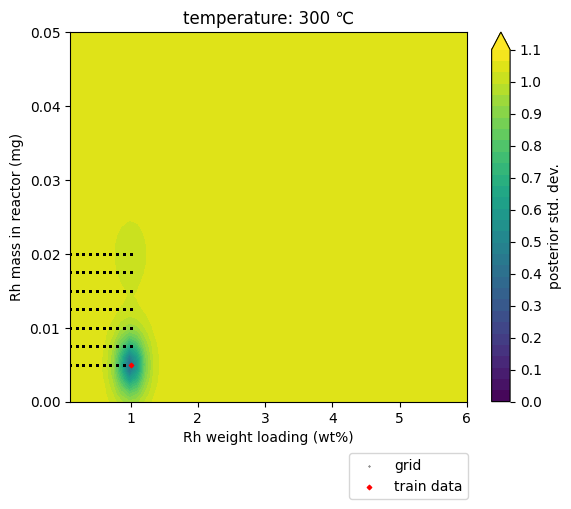

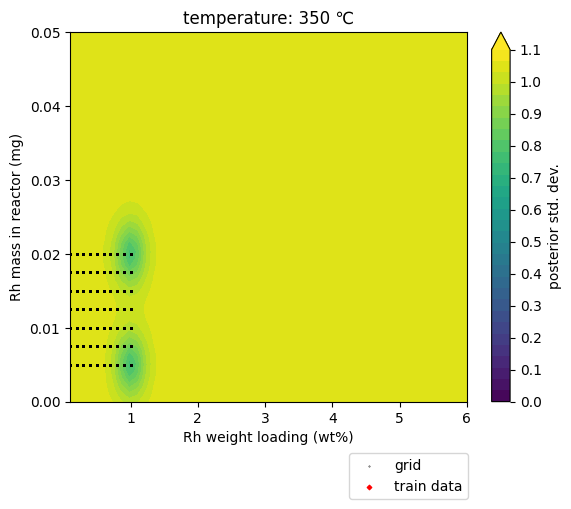

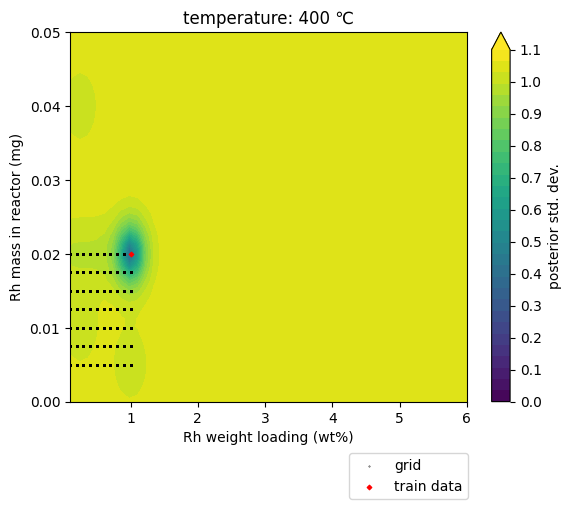

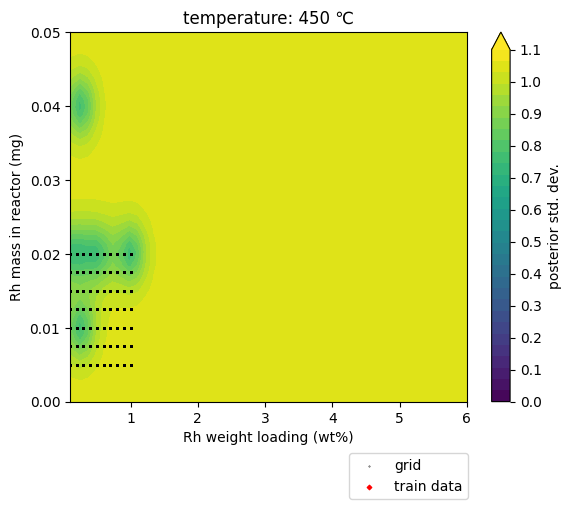

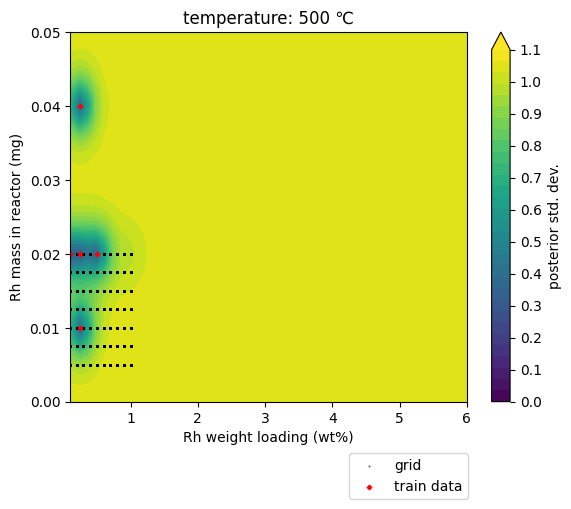

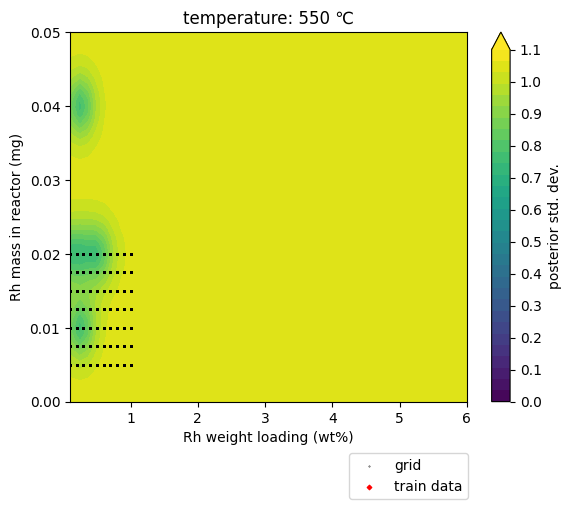

In [51]:
sigma_max = 1.1
levels = np.linspace(0,sigma_max,32) # for std
# levels = np.linspace(-2,2,11) # mean

for temperature in [300, 350, 400, 450, 500, 550]:
    cmap = plt.contourf(
        W_rh,
        M_rh, 
        wrapper_std_colloidal(W_rh, M_rh, temperature=temperature),
        # wrapper_mean_colloidal(W_rh, M_rh, temperature=temperature),
        extend = 'max',
        levels = levels
    )
    
    cbar = plt.colorbar(
        cmap,
        label = 'posterior std. dev.',
        ticks = np.linspace(0,sigma_max,int(sigma_max/0.1+1))
        
    )

    plot_grid(W_rh_plot, M_rh_plot)
    plot_train_data(Xtrain[(Xtrain[:,3]==1) & (Xtrain[:,0]==temperature)])
    
    # plt.xlim(0.1, 1.0)
    # plt.ylim(0.005, 0.02)
    plt.xlim(0.1, 6.0)
    plt.ylim(0.000, 0.05)
    plt.xlabel('Rh weight loading (wt%)')
    plt.ylabel('Rh mass in reactor (mg)')
    plt.title(f'temperature: {temperature} ℃')
    plt.legend(bbox_to_anchor=(1.02, -0.12))
    plt.show()

전체 영역을 plot하니까 확실히 다른 category data의 영향이 잘 보임, e.g., at (5,0.02), (1, 0.04); 데이터가 없는데도 uncertainty 가 낮음. 한가지 짚고 넘어가야할 부분은, propagation of uncertainty seems to be too strong along 'weight loading' axis (x axis here). It might be related with the scaling...

### b. for 'WI' (impregnation)

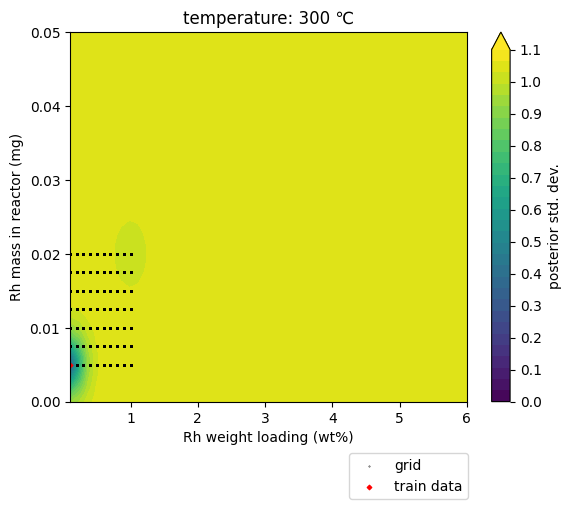

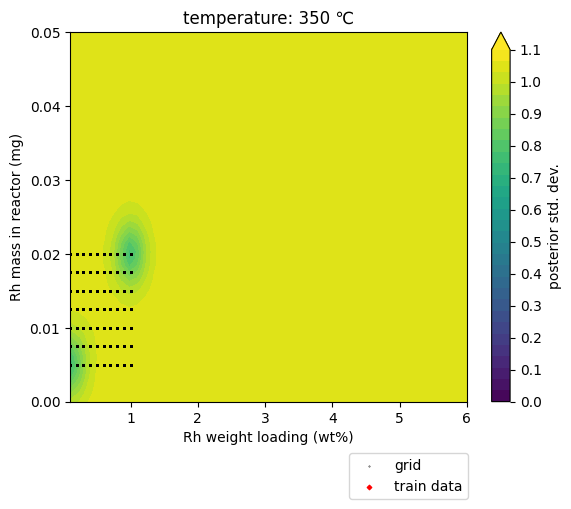

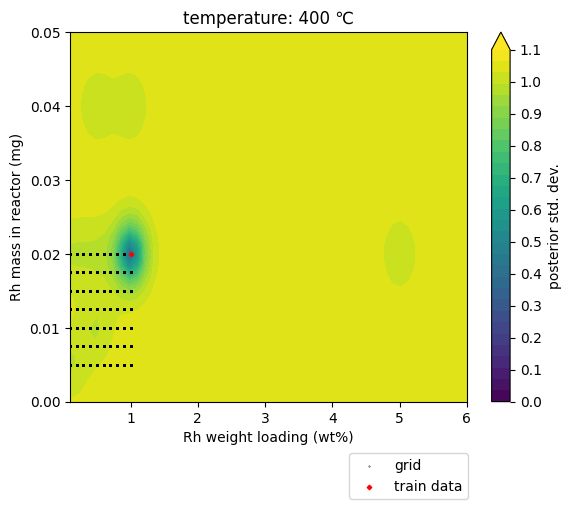

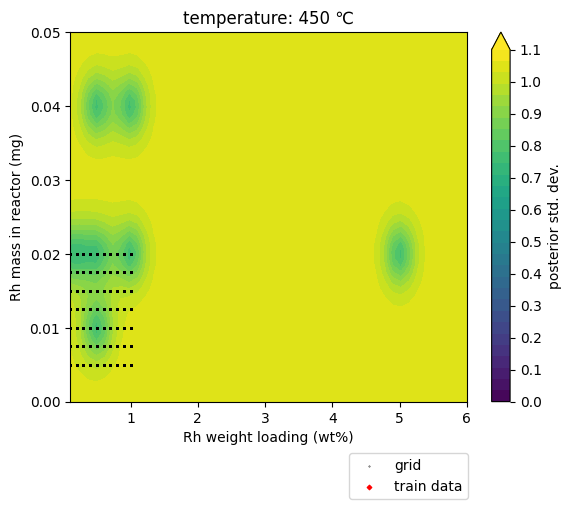

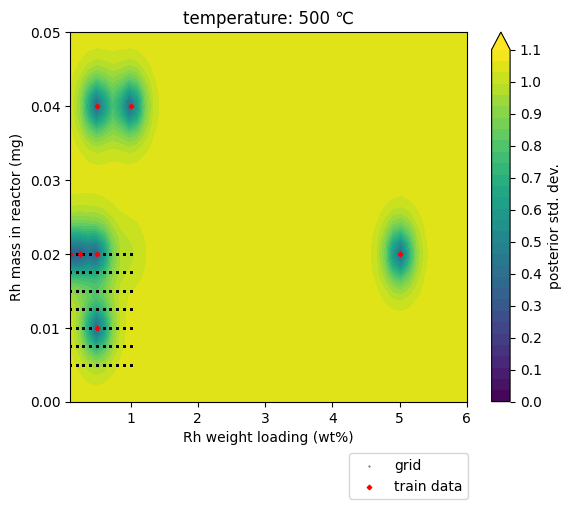

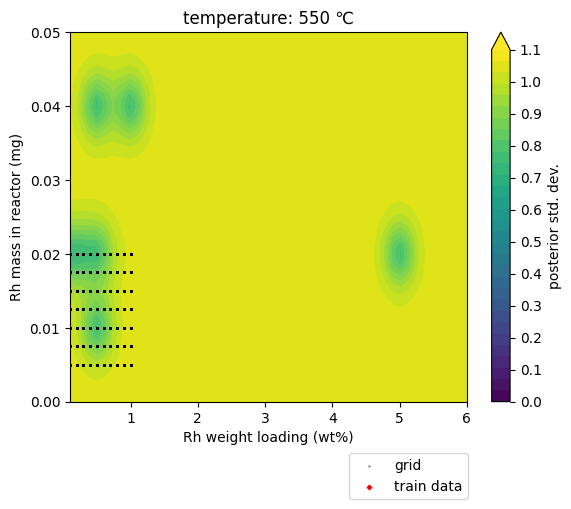

In [52]:
sigma_max = 1.1
levels = np.linspace(0,sigma_max,32) # for std
# levels = np.linspace(-2,2,11) # mean

for temperature in [300, 350, 400, 450, 500, 550]:
    cmap = plt.contourf(
        W_rh,
        M_rh, 
        wrapper_std_impregnation(W_rh, M_rh, temperature=temperature),
        # wrapper_mean_impregnation(W_rh, M_rh, temperature=temperature),
        extend = 'max',
        levels = levels
    )
    
    cbar = plt.colorbar(
        cmap,
        label = 'posterior std. dev.',
        ticks = np.linspace(0,sigma_max,int(sigma_max/0.1+1))
        
    )

    plot_grid(W_rh_plot, M_rh_plot)
    plot_train_data(Xtrain[(Xtrain[:,3]==0) & (Xtrain[:,0]==temperature)])
    
    # plt.xlim(0.1, 1.0)
    # plt.ylim(0.005, 0.02)
    plt.xlim(0.1, 6.0)
    plt.ylim(0.00, 0.05)
    plt.xlabel('Rh weight loading (wt%)')
    plt.ylabel('Rh mass in reactor (mg)')
    plt.title(f'temperature: {temperature} ℃')
    plt.legend(bbox_to_anchor=(1.02, -0.12))
    plt.show()

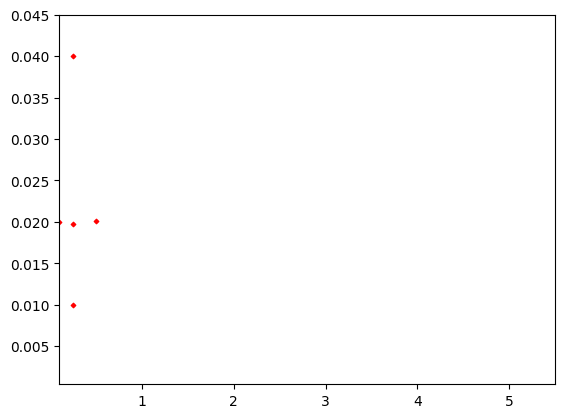

In [42]:
plot_train_data(Xtrain[Xtrain[:,3]=='colloidal'])
plt.xlim(0.1, 5.5)
plt.ylim(0.0004, 0.045)
plt.show()

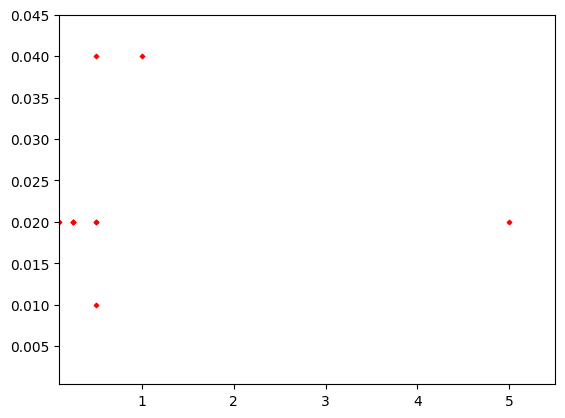

array([[500, 1.0, 0.04, 'impregnation'],
       [500, 0.25, 0.02, 'impregnation'],
       [500, 0.5, 0.02, 'impregnation'],
       [500, 0.5, 0.04, 'impregnation'],
       [500, 0.1, 0.02, 'impregnation'],
       [500, 0.5, 0.01, 'impregnation'],
       [500, 5.0, 0.02, 'impregnation'],
       [500, 0.25, 0.02, 'impregnation'],
       [500, 0.25, 0.02, 'impregnation'],
       [500, 0.5, 0.02, 'impregnation']], dtype=object)

In [43]:
plot_train_data(Xtrain[Xtrain[:,3]=='impregnation'])
plt.xlim(0.1, 5.5)
plt.ylim(0.0004, 0.045)
plt.show()
Xtrain[Xtrain[:,3]=='impregnation']